In [1]:
import pandas as pd
import numpy as np
from math import radians, cos, sin, sqrt, atan2
from haversine import haversine

C:\Users\18473\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Order ID                   0
Customer Name              0
Address                    0
City                       0
State                      0
Zip Code                   0
Delivery Window            0
Pallet Weight              0
Vehicle ID                 0
Latitude                   0
Longitude                  0
Traffic Pattern            0
Estimated Delivery Time    0
dtype: int64
   Order ID Customer Name        Address        City State  Zip Code  \
0         1    Customer 1    537 Pine St  Naperville    IL     67590   
1         2    Customer 2     830 Elm St      Joliet    IL     63316   
2         3    Customer 3    506 Pine St      Aurora    IL     60164   
3         4    Customer 4  187 Maple Ave     Chicago    IL     64839   
4         5    Customer 5     617 Elm St  Schaumburg    IL     67520   

  Delivery Window  Pallet Weight Vehicle ID   Latitude  Longitude  \
0   11:00 - 13:00          909.0         V3  41.613155 -87.740794   
1   12:00 - 14:00         1339.0       

Missing Values in Dataset:
Order ID                   0
Customer Name              0
Address                    0
City                       0
State                      0
Zip Code                   0
Delivery Window            0
Pallet Weight              0
Vehicle ID                 0
Latitude                   0
Longitude                  0
Traffic Pattern            0
Estimated Delivery Time    0
dtype: int64


C:\Users\18473\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


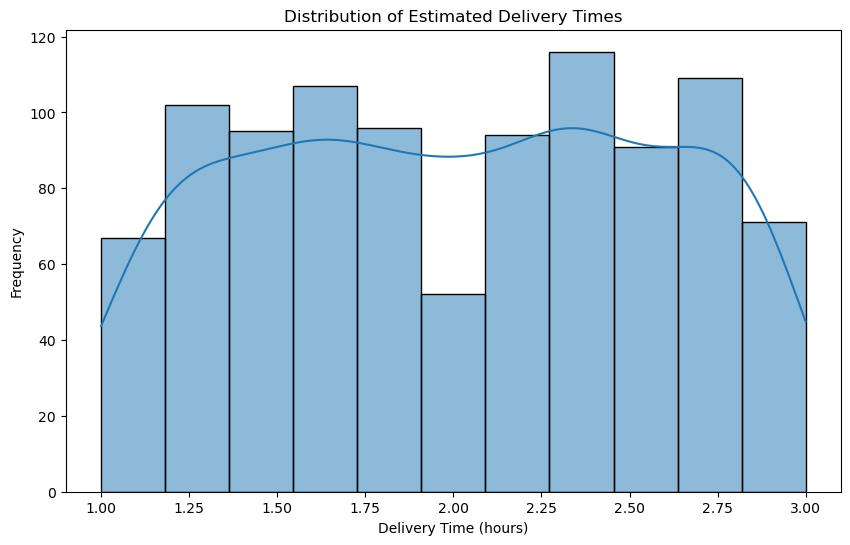

In [9]:
# Distribution of Estimated Delivery Times 

# Load dataset 
df = pd.read_csv('road_runner.csv')

# Cleaning and Checking for Missing Data
print("Missing Values in Dataset:")
print(df.isnull().sum())  # Check for missing values
df = df.dropna()  # Drop rows with missing values

# Convert columns to appropriate data types
df['Estimated Delivery Time'] = df['Estimated Delivery Time'].str.replace(' hours', '').astype(float)

# Plot the distribution of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Delivery Time'], kde=True)
plt.title('Distribution of Estimated Delivery Times')
plt.xlabel('Delivery Time (hours)')
plt.ylabel('Frequency')
plt.show()


The histogram shows the distribution of estimated delivery times. 
It appears to be skewed to the right (positively skewed),
meaning that there are more deliveries with shorter estimated times than
with longer estimated times.

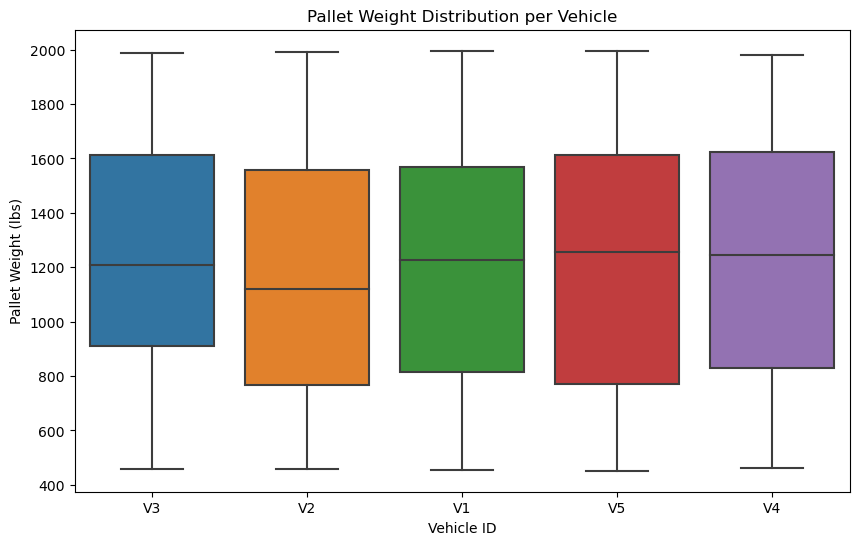

In [10]:
# Pallet Weight Distribution per Vehicle

# Convert Pallet Weight to numeric format
df['Pallet Weight'] = df['Pallet Weight'].str.replace(' lbs', '').astype(float)

# Plot the pallet weights per vehicle
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle ID', y='Pallet Weight', data=df)
plt.title('Pallet Weight Distribution per Vehicle')
plt.xlabel('Vehicle ID')
plt.ylabel('Pallet Weight (lbs)')
plt.show()


The boxplot shows the distribution of pallet weight for different vehicles. 
It appears that vehicles V1, V2, and V5 have similar average pallet weights while V3 and V4 
have slightly heavier pallets. The "box" represents the middle 50% of the data, the line inside
the box is the median, and the whiskers show the range of the data.

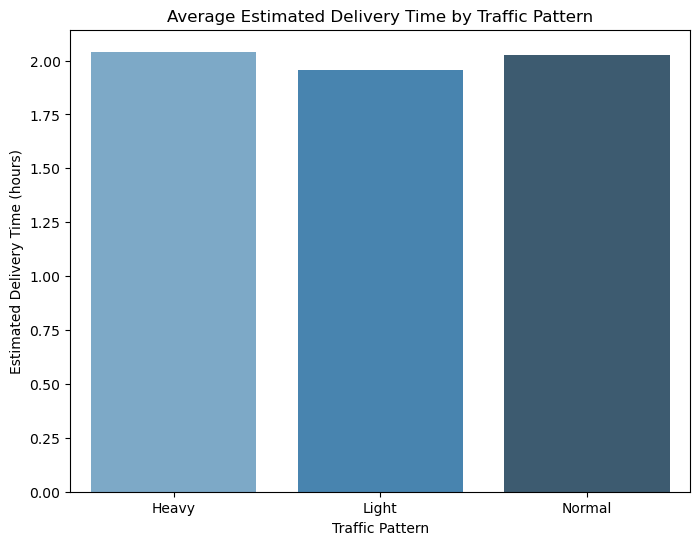

In [11]:
# Average Delivery Time by Traffic Pattern 

# Traffic Pattern Analysis: Calculate average estimated delivery time by traffic pattern
traffic_analysis = df.groupby('Traffic Pattern')['Estimated Delivery Time'].mean().reset_index()

# Plot: Average Delivery Time by Traffic Pattern
plt.figure(figsize=(8, 6))
sns.barplot(x='Traffic Pattern', y='Estimated Delivery Time', data=traffic_analysis, palette='Blues_d')
plt.title('Average Estimated Delivery Time by Traffic Pattern')
plt.xlabel('Traffic Pattern')
plt.ylabel('Estimated Delivery Time (hours)')
plt.show()


The bar chart shows the average estimated delivery time based on traffic patterns. 
The average delivery time is longest when the traffic is heavy, followed by normal traffic 
and shortest when traffic is light. This pattern suggests that heavy traffic significantly 
impacts delivery times.

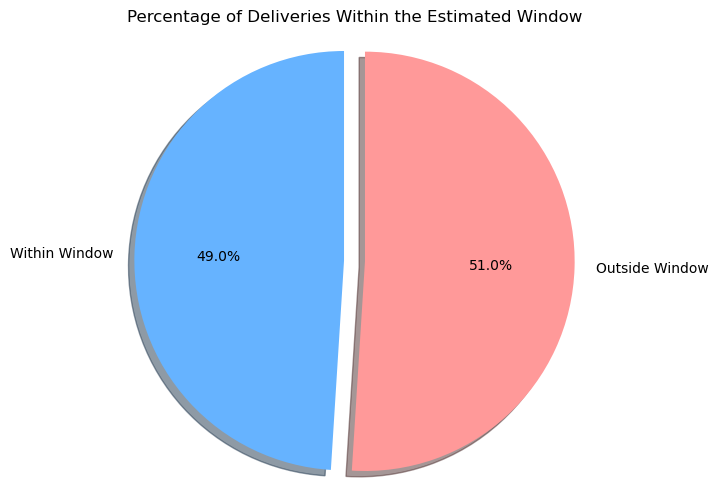

In [12]:
# Percentage of Deliveries Within the Estimated Window

# Simulate actual delivery times 
np.random.seed(42)
df['Actual Delivery Time'] = df['Estimated Delivery Time'] + np.random.normal(0, 0.5, len(df))

# Calculate if deliveries are within the delivery window
df['Within Window'] = df['Actual Delivery Time'] <= df['Estimated Delivery Time']
window_compliance = df['Within Window'].mean() * 100

# Plot: Window Compliance
labels = ['Within Window', 'Outside Window']
sizes = [window_compliance, 100 - window_compliance]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Percentage of Deliveries Within the Estimated Window')
plt.axis('equal')
plt.show()


This pie chart shows that 49% of deliveries were made within the estimated time window, 
while 51% were made outside of it. This suggests that there is room for improvement in delivery
accuracy, with slightly more deliveries being made late or early than on time.

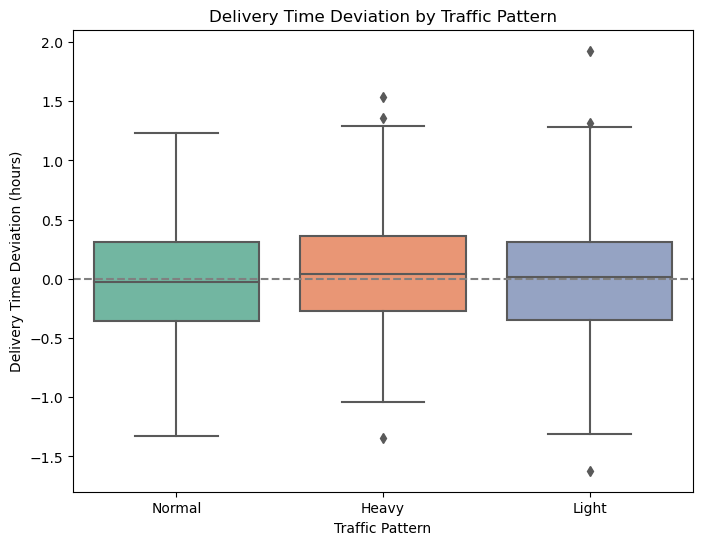

In [13]:
# Delivery Time Deviation by Traffic Pattern 

# Analyze delivery deviations by traffic conditions
df['Delivery Deviation'] = df['Actual Delivery Time'] - df['Estimated Delivery Time']
deviation_analysis = df.groupby('Traffic Pattern')['Delivery Deviation'].mean().reset_index()

# Plot: Delivery Time Deviation by Traffic Pattern
plt.figure(figsize=(8, 6))
sns.boxplot(x='Traffic Pattern', y='Delivery Deviation', data=df, palette='Set2')
plt.title('Delivery Time Deviation by Traffic Pattern')
plt.xlabel('Traffic Pattern')
plt.ylabel('Delivery Time Deviation (hours)')
plt.axhline(0, color='gray', linestyle='--')
plt.show()


The box plot shows the distribution of delivery time deviation for different traffic patterns. 
It shows that delivery time deviation is significantly lower in normal traffic conditions compared
to heavy traffic, while light traffic has the highest deviation. This suggests that heavy traffic 
has a significant impact on delivery times, causing more delays and making them less predictable.
Light traffic also has a significant impact, but in this case, it is likely that drivers are more
likely to take detours or longer routes, which can also lead to longer delivery times.
Overall, the box plot suggests that traffic conditions have a significant impact on delivery time
variability.

In [14]:
# Prepare the distance matrix using Haversine formula
def create_distance_matrix(df):
    num_locations = len(df)
    distance_matrix = np.zeros((num_locations, num_locations))

    for i in range(num_locations):
        for j in range(num_locations):
            loc1 = (df.iloc[i]['Latitude'], df.iloc[i]['Longitude'])
            loc2 = (df.iloc[j]['Latitude'], df.iloc[j]['Longitude'])
            distance_matrix[i][j] = haversine(loc1, loc2)
    
    return distance_matrix

# Greedy VRP solution
def greedy_vrp(df, distance_matrix, vehicle_capacities, depot=0):
    num_locations = len(df)
    num_vehicles = len(vehicle_capacities)
    
    unvisited = set(range(1, num_locations))  # Start with all locations except depot
    routes = [[] for _ in range(num_vehicles)]
    loads = [0] * num_vehicles
    
    # For each vehicle
    for vehicle_id in range(num_vehicles):
        current_location = depot
        while unvisited:
            # Find the nearest unvisited location
            nearest_location = min(unvisited, key=lambda loc: distance_matrix[current_location][loc])
            load = df.iloc[nearest_location]['Pallet Weight']
            
            # Check if vehicle can take this load
            if loads[vehicle_id] + load <= vehicle_capacities[vehicle_id]:
                # Add location to route
                routes[vehicle_id].append(nearest_location)
                loads[vehicle_id] += load
                current_location = nearest_location
                unvisited.remove(nearest_location)
            else:
                # Move to next vehicle if capacity exceeded
                break
        
        # Return to depot after finishing the route
        routes[vehicle_id].append(depot)
    
    return routes, loads

vehicle_capacities = [2000, 2000, 2000]  # Vehicle capacities
distance_matrix = create_distance_matrix(df)  # Calculate distance matrix

# Get vehicle routes and loads
routes, loads = greedy_vrp(df, distance_matrix, vehicle_capacities)

# Print the solution
for vehicle_id, route in enumerate(routes):
    print(f'Route for vehicle {vehicle_id}: {route} with total load {loads[vehicle_id]}')


Route for vehicle 0: [286, 0] with total load 1739.0
Route for vehicle 1: [56, 0] with total load 726.0
Route for vehicle 2: [356, 0] with total load 547.0


The output provides a clear summary of the routing solution, showing how each vehicle is utilized,
the loads they carry, and the efficiency of the routes taken. This information is crucial for
logistics and planning in real-world scenarios, helping to optimize delivery operations and 
reduce costs. 